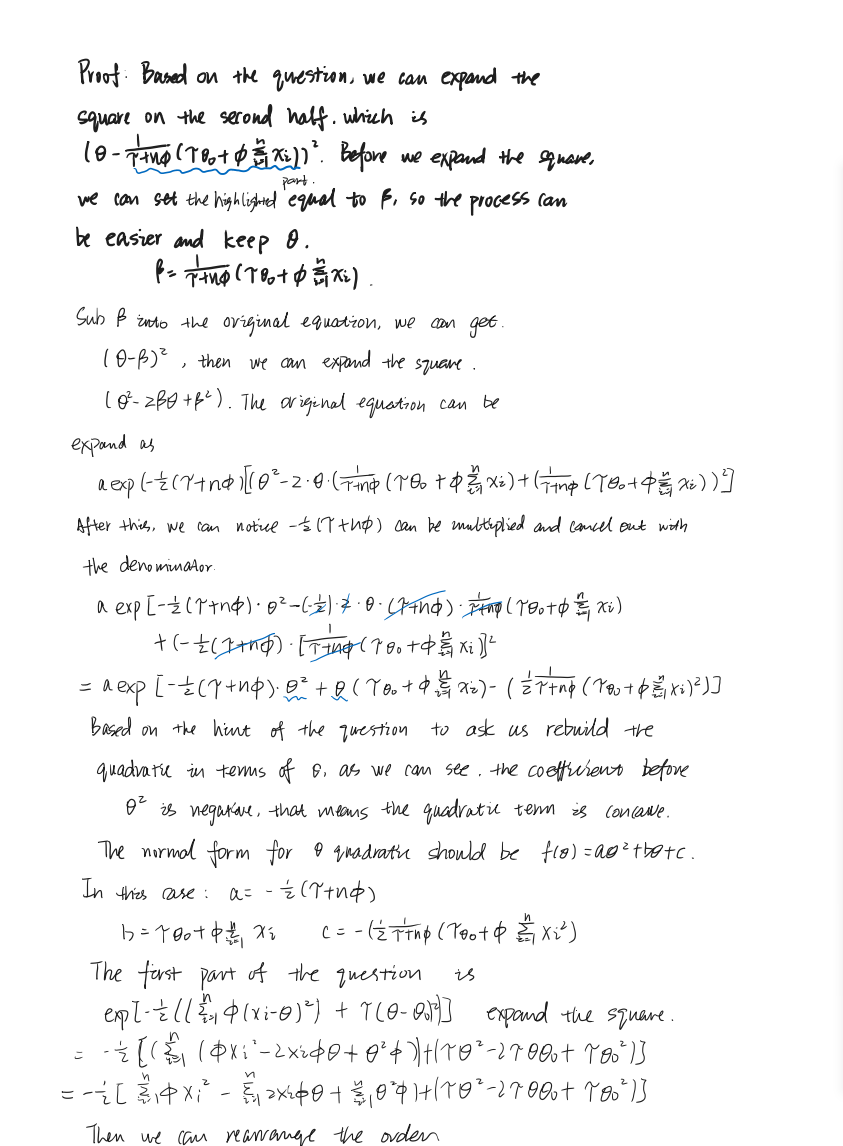


![aa0fdd6e909f21826f3986b8960a1a0.png](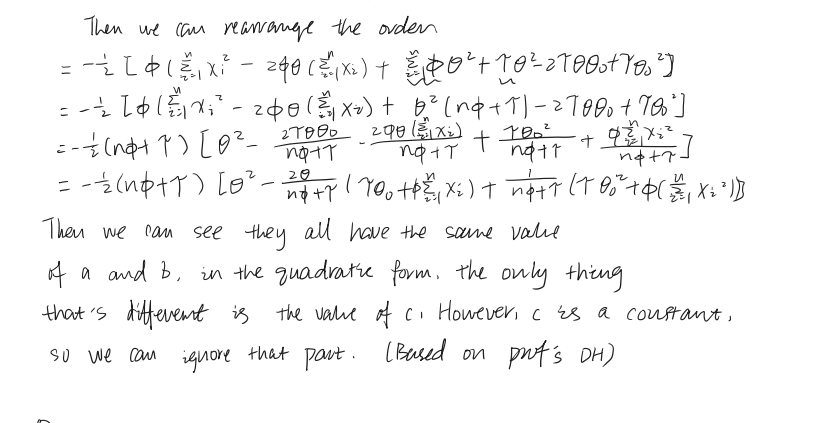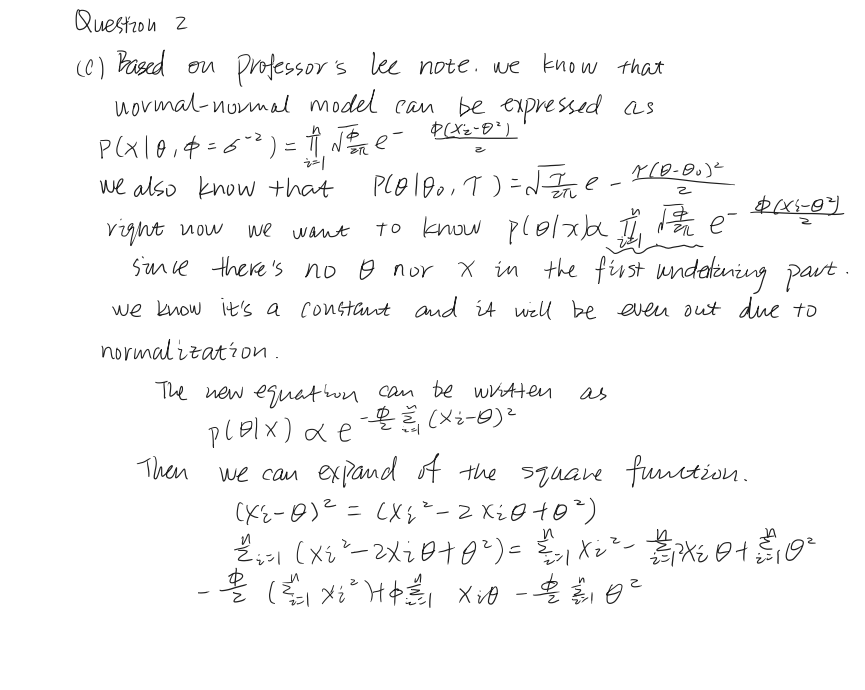)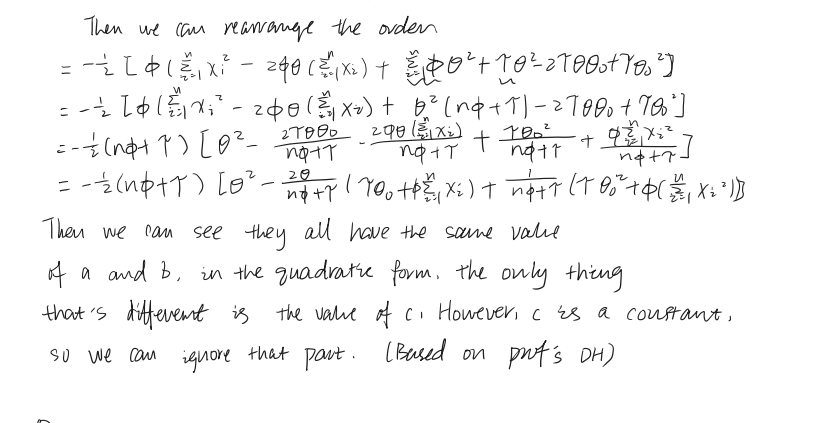

### Question 2(a)

In [ ]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

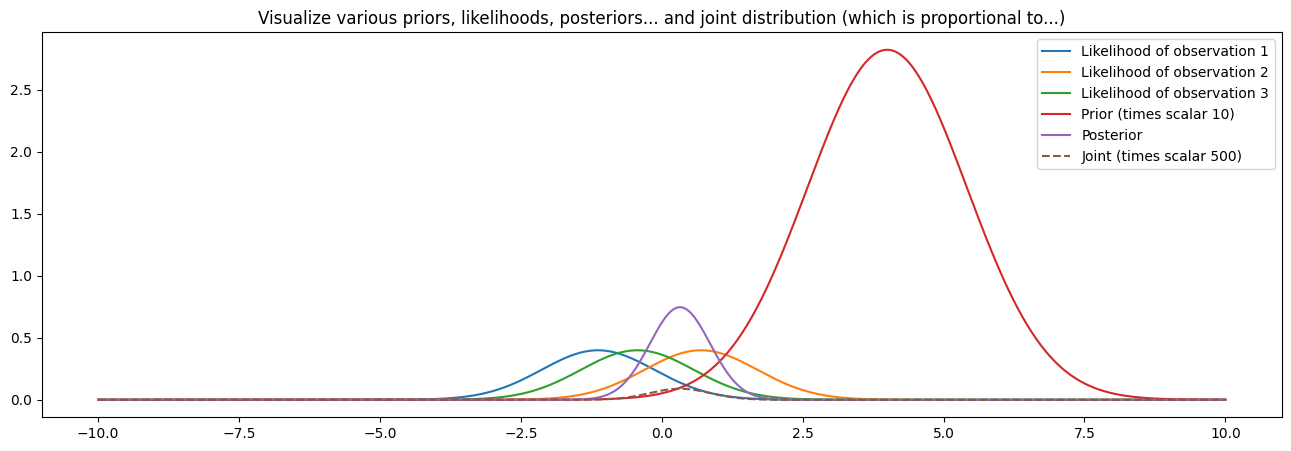

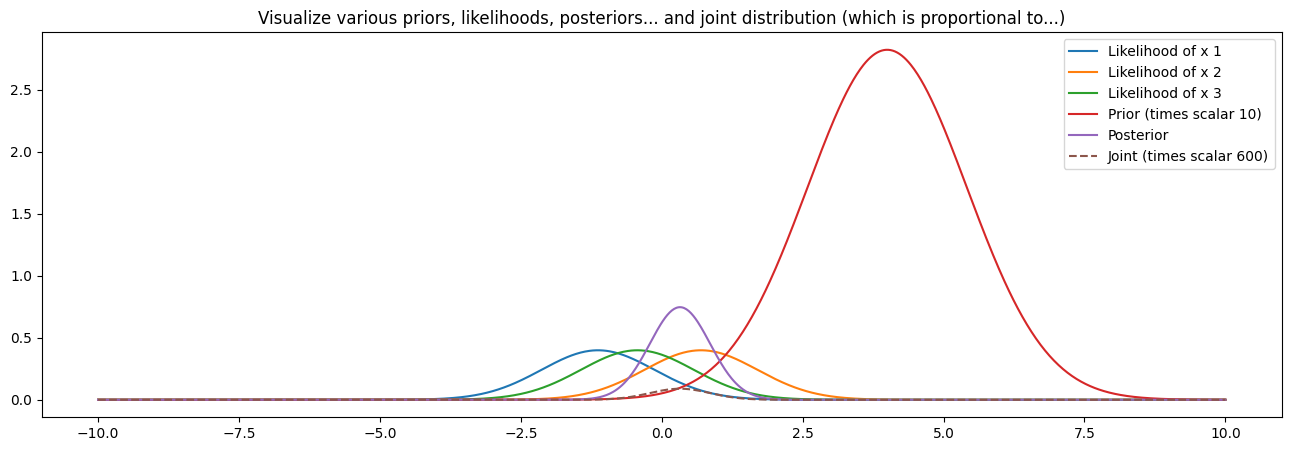

In [ ]:
#We need to set seed for replication
np.random.seed(400)


#State the observation number
n = 3

x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2

parameter_domain = np.linspace(-10, 10, 1001)
# Then, for each observation, we can do a likelihood calculation, since there are three different likelihood, then we can generate likelihoods to sum them.
likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]


# Based on professor's slide, we can generate the prior distribution
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Based on professor's slide, we can generate the jioint distribution, I set the value of c into 600
joint = 600 * np.prod(likelihoods, axis=0) * prior

# Based on professor's slide, we can generate the posterior distribution, set the pdf into our parameter domain
posterior = stats.norm(loc=(tau*theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).pdf(parameter_domain)


plt.figure(figsize=(16, 5))

# For visualization, we can draw out the likehoods individually
for i, individual_likelihood in enumerate(likelihoods):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of x {i+1}")


# Next, we can draw out the prior, posterior and joint seperately.
plt.plot(parameter_domain, 10*prior, label="Prior (times scalar 10)")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar 600)")

# Adding legend and title
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")

# Show plot
plt.show()

## Question 2(b)

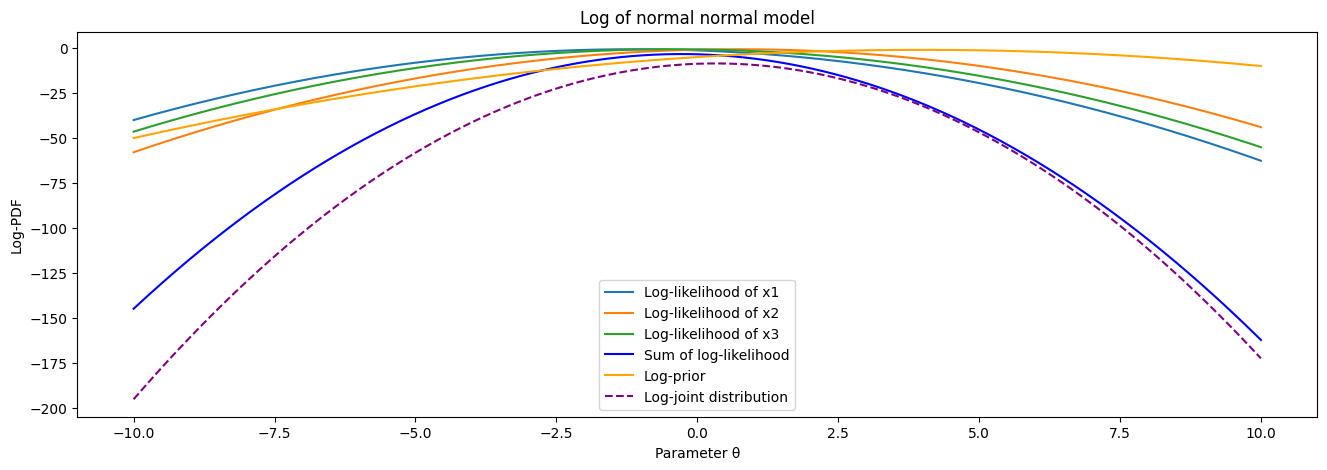

In [ ]:



#State the observation number
n = 3
#Based on professor's slife, we can set theta0 equals to 4 and tau equals to 1/2
theta_0, tau = 4, 1/2
#Since we need to set a number for phi, we can assume that the value of sigma square is equal to 1, which is phi
phi = 1

# Parameter domain for theta
parameter_domain = np.linspace(-10, 10, 1001)

# Then, for each observation, we generate a log_likelihood calculation, since there are three different likelihood, then we can generate likelihoods to sum them.
log_likelihoods = np.array([stats.norm.logpdf(xi, loc=parameter_domain, scale=1/phi**0.5) for xi in x])

# Combine all of the log likelihood together, so we can get the sum of them.
sum_of_log_likelihood = log_likelihoods.sum(axis=0)

# Based on professor's slide, we can generate the log prior distribution
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)

# For the log of joint distribution, we can just simply add the sum of log likelihood and log prior together.
log_joint = sum_of_log_likelihood + log_prior


plt.figure(figsize=(16, 5))

# For visualization, we can draw out the log likehoods individually, and luckly, the shape matched with professor's office hour description!
for i, log_likelihood in enumerate(log_likelihoods):
    plt.plot(parameter_domain, log_likelihood, label=f"Log-likelihood of x{i+1}")

# Next, we can draw out the prior, posterior and joint seperately.
plt.plot(parameter_domain, sum_of_log_likelihood, label="Sum of log-likelihood", color='blue')
plt.plot(parameter_domain, log_prior, label="Log-prior", color='orange')
plt.plot(parameter_domain, log_joint, label="Log-joint distribution", color='purple', linestyle='--')

# Adding legend and title
plt.legend()
plt.title("Log of normal normal model")
plt.xlabel("Parameter θ")
plt.ylabel("Log-PDF")

# Show plot without log scale due to negative log probabilities
plt.show()


[9.97800586e-64 1.78579715e-63 3.19226798e-63 ... 1.01500421e-70
 5.48460233e-71 2.96006528e-71]


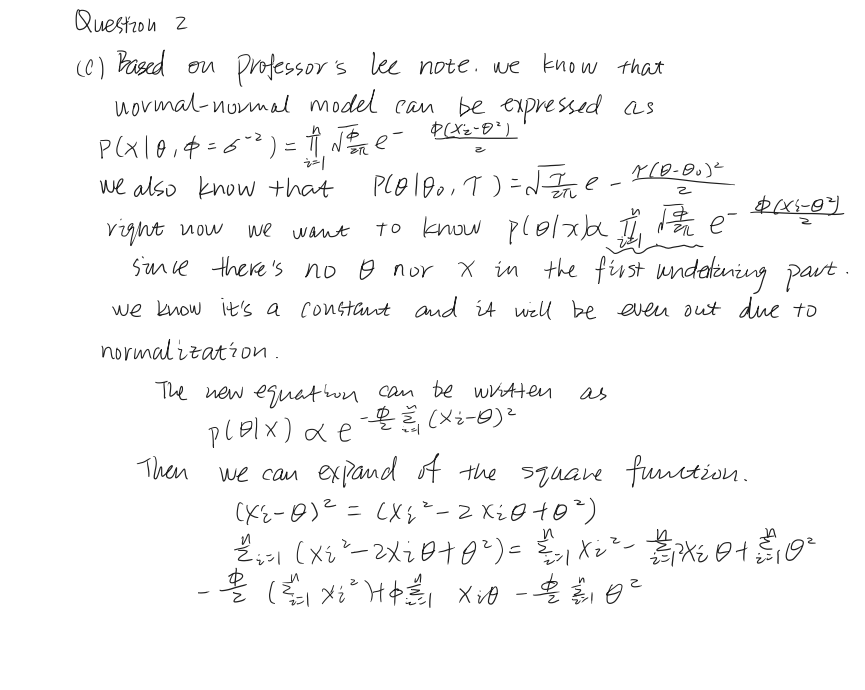